



**AIRBNB ANALYSIS**





In [2]:
#install the libraries 
!pip install geopandas
!pip install chart_studio
#!pip install geopandas
#!pip install chart_studio

     |████████████████████████████████| 972kB 7.2MB/s 
     |████████████████████████████████| 14.8MB 314kB/s 
     |████████████████████████████████| 6.5MB 18.9MB/s 
     |████████████████████████████████| 71kB 5.6MB/s 


In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import IPython
from IPython.display import HTML
from IPython.display import Image
import datetime
import geopandas as gpd
import folium
from folium import plugins
from folium.plugins import HeatMap
from folium import Choropleth
import chart_studio.plotly as py
import plotly.graph_objs as go
import branca
%matplotlib inline

In [4]:
#from google.colab import drive
#drive.mount('/content/drive')

KeyboardInterrupt: ignored

In [7]:
#load data
df_airbnb = pd.read_csv("https://raw.githubusercontent.com/hellojj7/Python-Viz/main/AB_NYC_2019.csv")


In [ ]:
df_airbnb.head(5)

id  ... availability_365
0  2539  ...              365
1  2595  ...              355
2  3647  ...              365
3  3831  ...              194
4  5022  ...                0

[5 rows x 16 columns]

In [ ]:
df_airbnb.describe()

id  ...  availability_365
count  4.889500e+04  ...      48895.000000
mean   1.901714e+07  ...        112.781327
std    1.098311e+07  ...        131.622289
min    2.539000e+03  ...          0.000000
25%    9.471945e+06  ...          0.000000
50%    1.967728e+07  ...         45.000000
75%    2.915218e+07  ...        227.000000
max    3.648724e+07  ...        365.000000

[8 rows x 10 columns]

In [ ]:
# Print some stats about the data
print('There are {} listings in the dataset'.format(len(df_airbnb)))
print('The dataset has {} columns with the following titles:\n'.format(len(df_airbnb.columns)))
for col in df_airbnb.columns:
    print(col)

There are 48895 listings in the dataset
The dataset has 16 columns with the following titles:

id
name
host_id
host_name
neighbourhood_group
neighbourhood
latitude
longitude
room_type
price
minimum_nights
number_of_reviews
last_review
reviews_per_month
calculated_host_listings_count
availability_365


In [ ]:
# Check which columns have missing data
df_airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

name, host_name, last-review and reviews per month have missing values. Specifically, both last_review and reviews_per_month have over 10k null's. Hence, these two columns seem to be related. Also the name of the place and the host name show 16 and 21 as missing, respectively. 

In [ ]:
# summary
print("Rows     :",df_airbnb.shape[0])
print("Columns  :",df_airbnb.shape[1])
print("\nFeatures :\n",df_airbnb.columns.tolist())
print("\nMissing Value    :",df_airbnb.isnull().sum().sum())
print("\nColumns with missing value:\n",df_airbnb.isnull().any())

Rows     : 48895
Columns  : 16

Features :
 ['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

Missing Value    : 20141

Columns with missing value:
 id                                False
name                               True
host_id                           False
host_name                          True
neighbourhood_group               False
neighbourhood                     False
latitude                          False
longitude                         False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
last_review                        True
reviews_per_month                  True
calculated_host_listings_count    False
availability_365                  False
dtype

The "id" is the Airbnb place that's listed. The host as identified as the "host_id" could be used to predict the price or the number of listings affecting the price and so that will be kept. 

In [ ]:
# Drop the 3 columns and have a look at the new dataset
df_airbnb.drop(['id', 'host_name','last_review'], axis=1, inplace=True)
df_airbnb.head(5)


name  ...  availability_365
0                Clean & quiet apt home by the park  ...               365
1                             Skylit Midtown Castle  ...               355
2               THE VILLAGE OF HARLEM....NEW YORK !  ...               365
3                   Cozy Entire Floor of Brownstone  ...               194
4  Entire Apt: Spacious Studio/Loft by central park  ...                 0

[5 rows x 13 columns]

In [ ]:
# replace all NaN values in 'reviews_per_month' with zero
df_airbnb.reviews_per_month.fillna(0, inplace=True)
# df_airbnb.fillna({'reviews_per_month': 0}, inplace=True)
# check for any columns with nulls. Only names left. We might also drop that.
print(df_airbnb.isnull().any())
df_airbnb.head(5)

name                               True
host_id                           False
neighbourhood_group               False
neighbourhood                     False
latitude                          False
longitude                         False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
reviews_per_month                 False
calculated_host_listings_count    False
availability_365                  False
dtype: bool


name  ...  availability_365
0                Clean & quiet apt home by the park  ...               365
1                             Skylit Midtown Castle  ...               355
2               THE VILLAGE OF HARLEM....NEW YORK !  ...               365
3                   Cozy Entire Floor of Brownstone  ...               194
4  Entire Apt: Spacious Studio/Loft by central park  ...                 0

[5 rows x 13 columns]

In [ ]:
# another check for missing data
df_airbnb.isnull().sum()

name                              16
host_id                            0
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

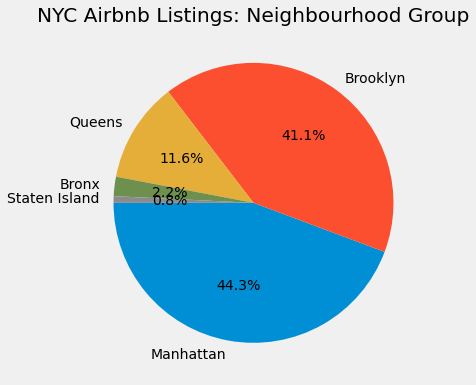

In [ ]:
# Neighbourhood Group
plt.style.use('fivethirtyeight')
plt.figure(figsize=(6,6))
plt.title("NYC Airbnb Listings: Neighbourhood Group")
g = plt.pie(df_airbnb.neighbourhood_group.value_counts(), labels=df_airbnb.neighbourhood_group.value_counts().index,autopct='%1.1f%%', startangle=180)
plt.show()

The majority of the 2019 Airbnb Listings in New York is in 2 boroughs: Manhattan and Brooklyn.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



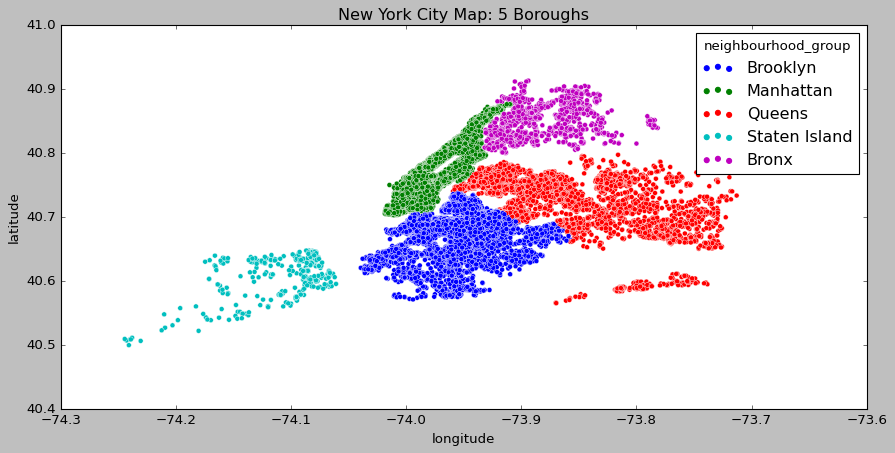

In [ ]:
# Map of neighbourhood group
plt.figure(figsize=(13,6))
plt.title("New York City Map: 5 Boroughs")
sns.scatterplot(df_airbnb.longitude,df_airbnb.latitude,hue=df_airbnb.neighbourhood_group)
plt.ioff()
plt.show()


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



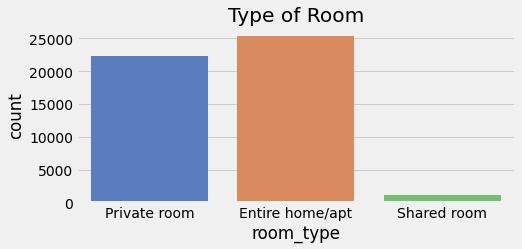

In [ ]:
# Room type
plt.figure(figsize=(7,3))
plt.title("Type of Room")
sns.countplot(df_airbnb.room_type, palette="muted")
fig = plt.gcf()
plt.show()

The Entire Home/Apartment accounts for the biggest share of the listing, and then the Private Room. The shared room makes up the least. 

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



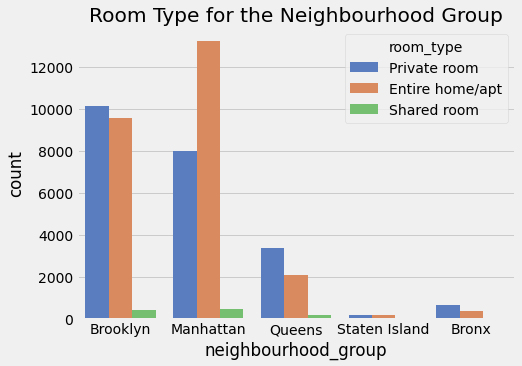

In [ ]:
plt.figure(figsize=(7,5))
plt.title("Room Type for the Neighbourhood Group")
sns.countplot(df_airbnb.neighbourhood_group,hue=df_airbnb.room_type, palette="muted")
plt.show()

The Entire Home/Apartment is listed the most in Manhattan while the listings for private rooms slightly outnumber the apartments in Brooklyn.



NameError: ignored

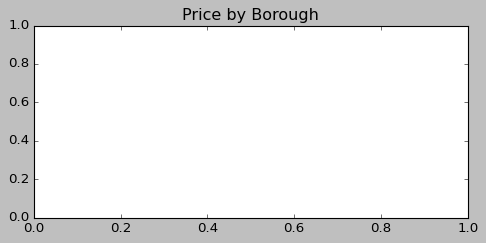

In [27]:
# Neighbourhood Group vs. Availability Room
plt.style.use('classic')
plt.figure(figsize=(7,3))
plt.title("Price by Borough")
# result = df_airbnb.groupby(["neighbourhood_group"])['price'].aggregate(np.median).reset_index().sort_values('price')
sns.boxplot(data=df_airbnb, x='neighbourhood_group',y=price, palette="dark")
plt.show()

In [ ]:
result = df_airbnb.groupby(["neighbourhood_group"])['price'].aggregate(np.median).reset_index().sort_values('price')

In [ ]:
result = df_airbnb.groupby(["neighbourhood_group"])['price'].aggregate(np.median).reset_index().sort_values('price')

In [1]:
#catplot neighbourhood_group and price
sns.catplot(x="neighbourhood_group", y="price", kind="boxen",
            data=df);

NameError: ignored

Brooklyn shows the least availability and Staten Island the most. The supply/demand dynamics are at play here. 

<Figure size 1200x640 with 0 Axes>

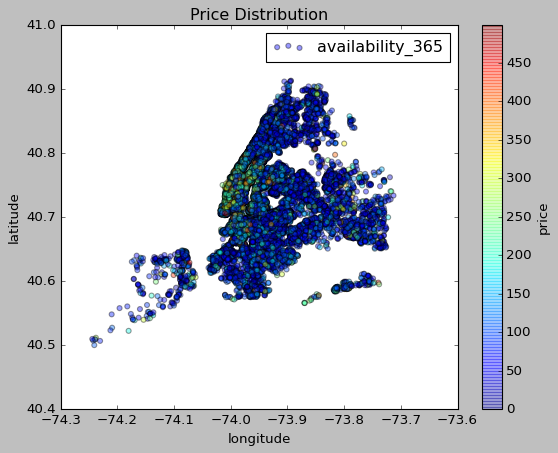

In [ ]:
# Neighbourhood Group Price Distribution
# Price vs. Area
plt.figure(figsize=(15,8))
ax=df_airbnb[df_airbnb.price<500].plot(kind='scatter', x='longitude',y='latitude',label='availability_365',c='price',cmap=plt.get_cmap('jet'),colorbar=True,alpha=0.4)
plt.title("Price Distribution")
ax.legend()
# plt.ioff()
plt.show()

The most expensive listings (in red) are in Manhattan. Also the further away from Manhattan the lower the price (in blue).

In [ ]:
set(df_airbnb['neighbourhood_group'])
{'Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'}
df_airbnb.groupby('neighbourhood_group')['price'].describe()

count        mean         std  ...    50%    75%      max
neighbourhood_group                                   ...                       
Bronx                 1091.0   87.496792  106.709349  ...   65.0   99.0   2500.0
Brooklyn             20104.0  124.383207  186.873538  ...   90.0  150.0  10000.0
Manhattan            21661.0  196.875814  291.383183  ...  150.0  220.0  10000.0
Queens                5666.0   99.517649  167.102155  ...   75.0  110.0  10000.0
Staten Island          373.0  114.812332  277.620403  ...   75.0  110.0   5000.0

[5 rows x 8 columns]

In [11]:
df_airbnb.groupby('neighbourhood_group')['price'].median()

neighbourhood_group
Bronx             65
Brooklyn          90
Manhattan        150
Queens            75
Staten Island     75
Name: price, dtype: int64

In [ ]:
plt.figure(figsize=(7,5))
plt.title("Room Type for the Neighbourhood Group")
sns.countplot(df_airbnb.neighbourhood_group,hue=df_airbnb.room_type, palette="muted")
plt.show()

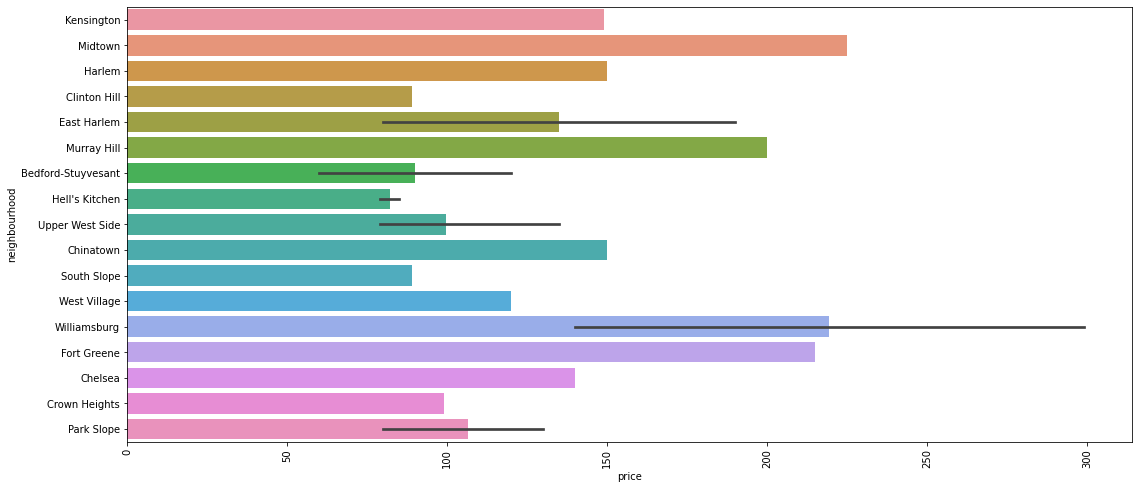

In [14]:
#neighbourhood - price
plt.figure(figsize=(18,8))
#result = df.groupby(["neighbourhood"])['price'].aggregate(np.median).reset_index().sort_values('price')
sns.barplot(x=df_airbnb.price[:25], y=df_airbnb.neighbourhood[:25]) #formerly: sns.barplot(x='Id', y="Speed", data=df, palette=colors, order=result['Id'])
plt.xticks(rotation=90)
plt.show()

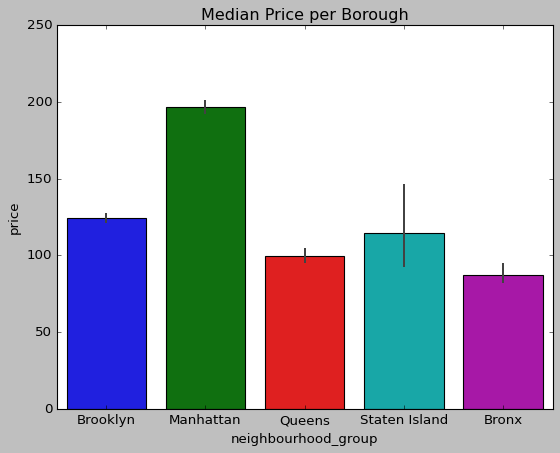

In [35]:
# alternative visualization of median less impacted by the extreme values
# see https://www.kaggle.com/nidaguler/eda-and-data-visualization-ny-airbnb

title = 'Median Price per Borough'
result = df_airbnb.groupby(["neighbourhood_group"])['price'].aggregate(np.median).reset_index().sort_values('price')
sns.barplot(x='neighbourhood_group', y="price", data=df_airbnb)
#for index, row in result.iterrows():
#    g.text(row.name,row.tip, round(row.price,2), color='black', ha="center")
plt.title(title)
plt.ioff()
#%matplotlib inline
#df=pd.read_csv("https://raw.githubusercontent.com/wesm/pydata-    book/master/ch08/tips.csv", sep=',')
#groupedvalues=df.groupby('day').sum().reset_index()
#g=sns.barplot(x='day',y='tip',data=groupedvalues)

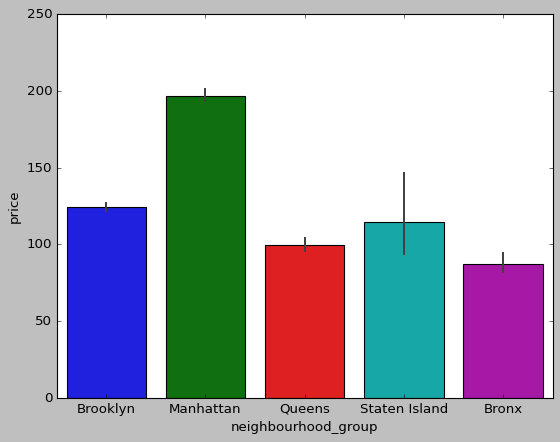

In [36]:
#neighbourhood_group - price
result = df_airbnb.groupby(["neighbourhood_group"])['price'].aggregate(np.median).reset_index().sort_values('price')
sns.barplot(x='neighbourhood_group', y="price", data=df_airbnb)
plt.show()

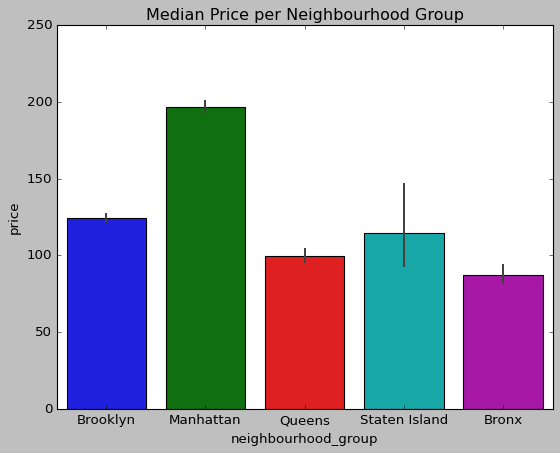

In [39]:

title = 'Median Price per Borough'
result = df_airbnb.groupby(["neighbourhood_group"])['price'].aggregate(np.median).reset_index().sort_values('price')
sns.barplot(x='neighbourhood_group', y="price", data=df_airbnb)
plt.title(title)
plt.ioff()

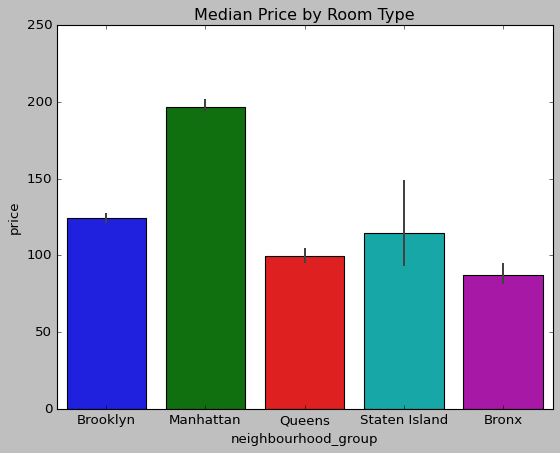

In [48]:
title = 'Median Price by Room Type'
result = df_airbnb.groupby(["neighbourhood_group"])['price'].aggregate(np.median).reset_index().sort_values('price')
sns.barplot(x='neighbourhood_group', y="price", data=df_airbnb)
plt.title(title)
plt.ioff()

In [ ]:
# Use Seaborn's context settings to make fonts larger.
import seaborn as sns
sns.set_context('talk')

# Create a grouped bar chart, with job as the x-axis
# and gender as the variable we're grouping on so there
# are two bars per job.
fig, ax = plt.subplots(figsize=(12, 8))

# Our x-axis. We basically just want a list
# of numbers from zero with a value for each
# of our jobs.
x = np.arange(len(df.job.unique()))

# Define bar width. We need this to offset the second bar.
bar_width = 0.4

b1 = ax.bar(x, df.loc[df['sex'] == 'men', 'count'],
            width=bar_width, label='Men')
# Same thing, but offset the x.
b2 = ax.bar(x + bar_width, df.loc[df['sex'] == 'women', 'count'],
            width=bar_width, label='Women')

# Fix the x-axes.
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(df.job.unique())

# Add legend.
ax.legend()

# Axis styling.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

# Add axis and chart labels.
ax.set_xlabel('Job', labelpad=15)
ax.set_ylabel('# Employed', labelpad=15)
ax.set_title('Employed Workers by Gender for Select Jobs', pad=15)

fig.tight_layout()

Most Airbnb listings are in either Manhattan or Brooklyn. But, these two regions are also the highest prices among the 5 boroughs. This is likely due to higher demand leading hosts to rent out these places.

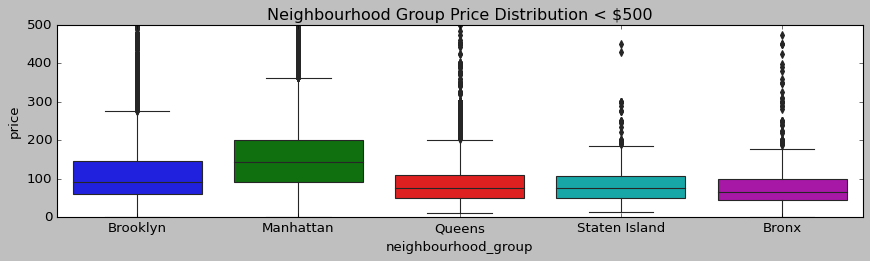

In [ ]:
plt.style.use('classic')
plt.figure(figsize=(13,3))
plt.title("Neighbourhood Group Price Distribution < $500")
sns.boxplot(y="price",x ='neighbourhood_group' ,data = df_airbnb[df_airbnb.price<500], order=)
plt.show()

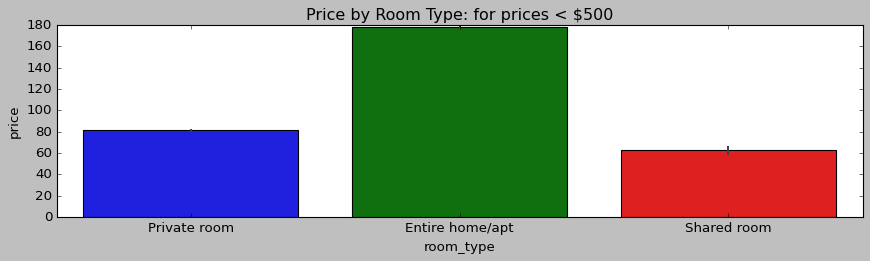

In [47]:
plt.style.use('classic')
plt.figure(figsize=(13,3))
plt.title("Price by Room Type: for prices < $500")
sns.barplot(y="price",x ='room_type' ,data = df_airbnb[df_airbnb.price<500])
plt.show()

Manhattan boasts the highest price range with about $140 as an average price, followed by Brooklyn with $90 and then the rest charging about $20 less.

In [8]:
df_airbnb.pivot_table(index='neighbourhood_group',columns='room_type',values='price',aggfunc='mean')

room_type            Entire home/apt  Private room  Shared room
neighbourhood_group                                            
Bronx                     127.506596     66.788344    59.800000
Brooklyn                  178.327545     76.500099    50.527845
Manhattan                 249.239109    116.776622    88.977083
Queens                    147.050573     71.762456    69.020202
Staten Island             173.846591     62.292553    57.444444

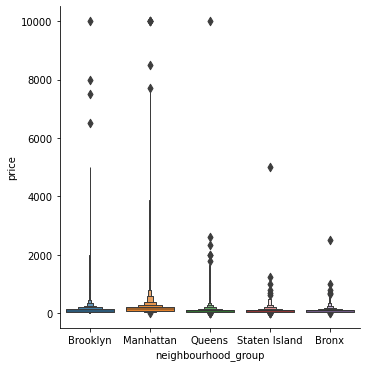

In [10]:
#catplot neighbourhood_group and price
sns.catplot(x="neighbourhood_group", y="price", kind="boxen",
            data=df_airbnb);

you can get a private room in Brooklyn for about $10 less than what you would have to pay for a shared room in Manhattan.  

Text(0.5, 1.0, 'Histogram of listing prices')

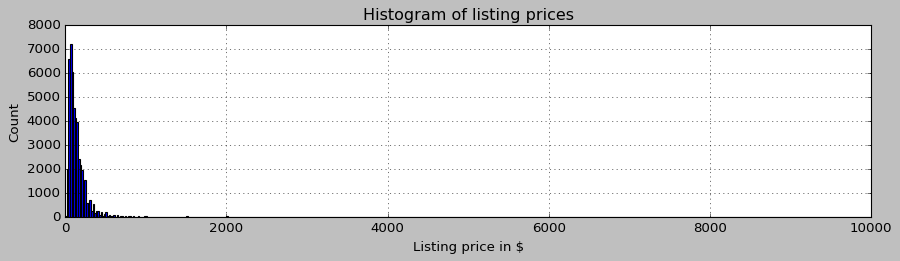

In [ ]:
# Some summary stats
plt.figure(figsize=(13,3))
df_airbnb['price'].hist(bins=500)
plt.ylabel('Count')
plt.xlabel('Listing price in $')
plt.title('Histogram of listing prices')

In [ ]:
df_airbnb.price.describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

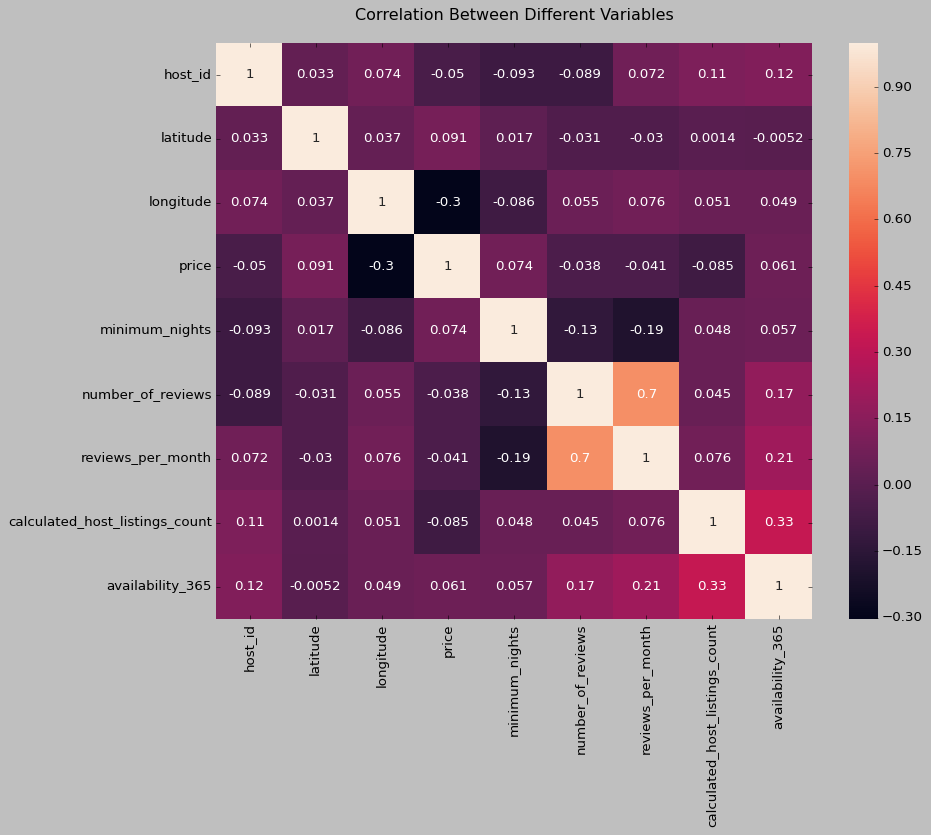

In [ ]:
# correlation
corr = df_airbnb.corr(method='kendall')
plt.figure(figsize=(12,9))
plt.title("Correlation Between Different Variables\n")
sns.heatmap(corr, annot=True)
plt.show()

The only correlation that stands out is between the reviews per month and the number of reviews (corr 0.7).  

In [ ]:
#prediction
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
from sklearn import preprocessing
import pandas.util.testing as tm
import warnings 
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
#encode label with value between 0 and n_classes-1
encode = preprocessing.LabelEncoder()
#fit label encoder
encode.fit(df_airbnb.neighbourhood_group)
df_airbnb.neighbourhood_group=encode.transform(df_airbnb.neighbourhood_group)

In [ ]:
# Transform labels to normalized encoding
encode = preprocessing.LabelEncoder()
encode.fit(df_airbnb.neighbourhood)
df_airbnb.neighbourhood=encode.transform(df_airbnb.neighbourhood)

In [ ]:
encode = preprocessing.LabelEncoder()
encode.fit(df_airbnb.room_type)
df_airbnb.room_type=encode.transform(df_airbnb.room_type)

In [ ]:
df_airbnb.sort_values(by='price',ascending=True,inplace=True)

print(df_airbnb.head(20))

                                                    name  ...  availability_365
25796       Cozy yet spacious private brownstone bedroom  ...               222
25634    MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)  ...                 0
25433      ★Hostel Style Room | Ideal Traveling Buddies★  ...               127
25753                    Sunny, Quiet Room in Greenpoint  ...                 0
23161  Huge Brooklyn Brownstone Living, Close to it all.  ...                28
25795  Contemporary bedroom in brownstone with nice view  ...               232
26841  Coliving in Brooklyn! Modern design / Shared room  ...               333
25778      Modern apartment in the heart of Williamsburg  ...                73
25794  Spacious comfortable master bedroom with nice ...  ...               176
26866             Best Coliving space ever! Shared room.  ...               139
26259                              the best you can find  ...                 0
22835                            IT'S SI

In [ ]:
#Train linier regression model
slr = LinearRegression()
x = df_airbnb[['host_id','neighbourhood_group','neighbourhood','latitude','longitude','room_type','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']]
y = df_airbnb['price']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

In [ ]:
slr.fit(X_train,y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)


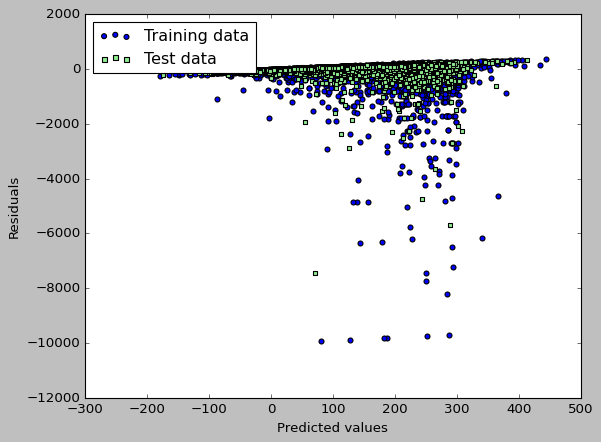

In [ ]:
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='lightgreen', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.show()

In [ ]:
#prediction

# predicts = slr(X_test)

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
rms_ols2=np.sqrt(mean_squared_error(y_test,y_test_pred))
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

# ("Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_test, predicts)))
# print("R2 Score: ", r2_score(y_test,predicts) * 100)
# print("Mean Absolute Error: ", mean_absolute_error(y_test,predicts))
# print("Mean Squareroot Error: ", mean_squared_error(y_test,predicts))

MSE train: 57389.497, test: 32664.814
R^2 train: 0.087, test: 0.116


In [ ]:
#Actual Vs Predicted for Linear Regression
lr_pred_df = pd.DataFrame({
        'actual_values': np.array(y_test).flatten(),
        'predicted_values': y_test_pred.flatten()}).head(20)

print(lr_pred_df.head(5))


   actual_values  predicted_values
0            400        135.112125
1            140        210.599057
2            195        176.222978
3            120        100.439183
4             88         88.545753


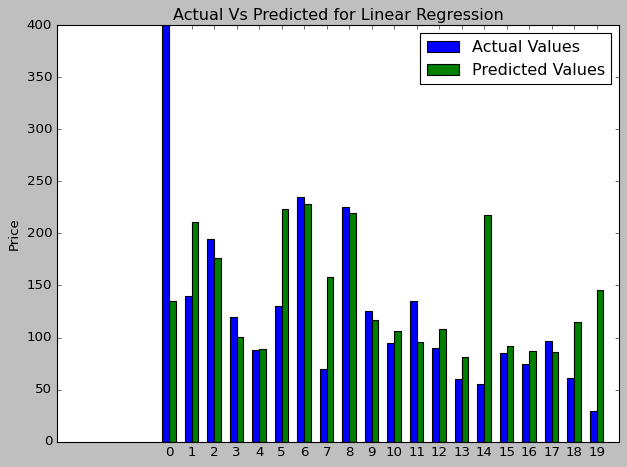

In [ ]:
x = lr_pred_df.index
width = 0.30
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, lr_pred_df.actual_values, width, label='Actual Values')
rects2 = ax.bar(x + width/2, lr_pred_df.predicted_values, width, label='Predicted Values')
ax.set_ylabel('Price')
ax.set_title('Actual Vs Predicted for Linear Regression')
ax.set_xticks(x)
ax.legend()
fig.tight_layout()
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=500, 
                               criterion='mse', 
                               random_state=300, 
                               n_jobs=-1)
forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 7123.393, test: 31327.104
R^2 train: 0.887, test: 0.153


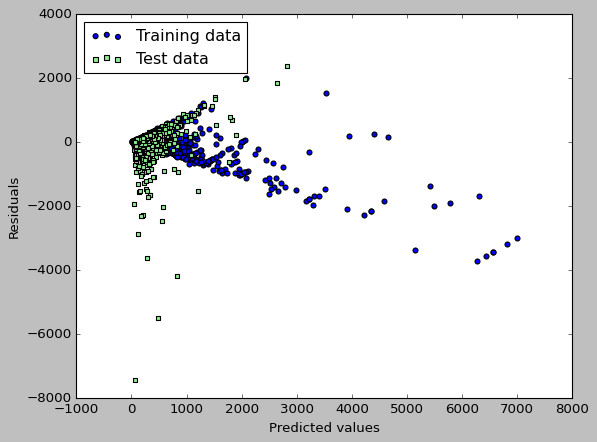

In [ ]:
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='lightgreen', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.show()

## ***Visualization with GeoPandas and Folium ***

In [ ]:
# Check if geopandas is installed 
>>> import sys
>>> 'geopandas' in sys.modules

False

In [ ]:
import chart_studio.plotly as py
import plotly.graph_objs as go

In [ ]:
import geopandas as gpd
import folium
from folium import plugins
from folium.plugins import HeatMap
from folium import Choropleth


In [ ]:
# get the shapefiles for all of the neighbourhoods in NYC. https://data.cityofnewyork.us/City-Government/Neighborhood-Tabulation-Areas/cpf4-rkhq
gdf_nyc_boundaries = gpd.read_file("https://data.cityofnewyork.us/api/geospatial/cpf4-rkhq?method=export&format=Shapefile")
gdf_nyc_boundaries.set_index('ntacode', inplace=True)
gdf_nyc_boundaries.head(5)


boro_code  ...                                           geometry
ntacode             ...                                                   
BK88           3.0  ...  POLYGON ((-73.97605 40.63128, -73.97717 40.630...
QN51           4.0  ...  POLYGON ((-73.80379 40.77561, -73.80099 40.775...
QN27           4.0  ...  POLYGON ((-73.86110 40.76366, -73.85993 40.762...
BK95           3.0  ...  POLYGON ((-73.94826 40.63861, -73.94923 40.638...
QN07           4.0  ...  POLYGON ((-73.75726 40.71814, -73.75589 40.716...

[5 rows x 7 columns]

In [ ]:
# add the number of listings in each neighbourhood to the neighbourhood in the geodata
count_data_df = df_airbnb[['neighbourhood']].neighbourhood.value_counts()
gdf_nyc_boundaries["listing_count"] = 0

for ii in range(len(count_data_df)):
    key = count_data_df.keys()[ii]
    
    index = gdf_nyc_boundaries.index[gdf_nyc_boundaries['ntaname'] == key]
    if len(index) > 0:
        gdf_nyc_boundaries.loc[index[0], ('listing_count')] = count_data_df[ii]

gdf_nyc_boundaries.head()

boro_code  ... listing_count
ntacode             ...              
BK88           3.0  ...           136
QN51           4.0  ...           485
QN27           4.0  ...           185
BK95           3.0  ...             0
QN07           4.0  ...            14

[5 rows x 8 columns]

In [ ]:
# create a function to plot the maps 
def embed_map(m, file_name):
    from IPython.display import IFrame
    m.save(file_name)
    return IFrame(file_name, width='100%', height='500px')

In [ ]:
# visualize all the listings using folium
listing_map = folium.Map(location=[40.730610,-73.935242], tiles='cartodbpositron', zoom_start=10)
folium.Choropleth(geo_data=gdf_nyc_boundaries['geometry'].__geo_interface__,
           key_on="feature.id",
           data=gdf_nyc_boundaries['listing_count'],
           fill_color='YlOrRd',
           legend_name='NYC Neighbourhoods'
          ).add_to(listing_map)
# display map
listing_map
# embed_map(listing_map, 'listing_map.html')

The more listings the more red the color is for that area. 

In [ ]:
ny_map = folium.Map(location=[40.7, -74],zoom_start =10)
data_loc= df_airbnb[['latitude','longitude']].values
data_loc =data_loc.tolist()
hm = plugins.HeatMap(data_loc)
hm.add_to(ny_map)
ny_map

The dominance of listings in Manhattan & Brooklyn is denoted by the red blob.

**Listing Price**

In [ ]:
df_airbnb.price.describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

The price ranges from 0 to 10,000, and the average price is 106. We deep dive to see the distributions based on the percentile. Most Airbnb places are in either Manhattan or Brooklyn. The most expensive listings (top 25%) are in Manhattan. Majority of the middle 50% of listings is in Brooklyn and Queens. Staten Island and The Bronx don't have as many listings as the other three boroughs. Likely due to high demand Manhattan and Brookyn command the highest prices.  

In [ ]:
!pip install branca
!pip install folium

In [ ]:
import folium 
#import Branca.colormap as m

def color_producer(val):
    if val < 69:
        return 'forestgreen'
    if val < 175:
        return 'darkorange'
    else:
        return 'darkred'
        
price_map = folium.Map(location=[40.730610,-73.935242], tiles='cartodbpositron', zoom_start=10)

for i in range(0, len(df_airbnb)):
    folium.Circle(
        location=[df_airbnb.iloc[i]['latitude'], df_airbnb.iloc[i]['longitude']],
        radius=25,
        color=color_producer(df_airbnb.iloc[i]['price'])
    ).add_to(price_map)
#price_map
# embed_map(price_map, 'price_map.html')

#colormap = colormap.to_step(index=[0, 69, 106, 175, 10000])
#colormap.caption = 'Airbnb Listing Price in NYC'
#olormap.add_to(price_map)

price_map
# embed_map(price_map, 'price_map.html')

# create a LinearColorMap and assign colors, vmin, and vmax
# the colormap will show green for $100,000 homes all the way up to red for $1,500,000 homes
# colormap = cm.LinearColormap(colors=['green', 'yellow', 'red'], vmin=100000, vmax=1500000)

# create our map again.  This time I am using a different tileset for a new look
# m = folium.Map(location=center, zoom_start=10, tiles='Stamen Toner')

# Same as before... go through each home in set, make circle, and add to map.
# This time we add a color using price and the colormap object
# for i in range(len(df_airbnb)):
#    folium.Circle(
#        location=[df_airbnb.iloc[i]['latitude'], df_airbnb.iloc[i]['longitude']],
#        radius=10,
#        fill=True,
#        color=colormap(df_airbnb.iloc[i]['price']),
#        fill_opacity=0.2
#    ).add_to(m)

# the following line adds the scale directly to our map
#m.add_child(colormap)

# Save map 
#m    


The most expensive listings (top 25%) are in Manhattan. Majority of the middle 50% of listings is in Brooklyn and Queens. Staten Island and The Bronx don't have close to as many listings as the other three boroughs.

**The Most Reviewed **

In [ ]:
df_airbnb_top_reviewed = df_airbnb.nlargest(100, 'number_of_reviews')
df_airbnb_top_reviewed[['number_of_reviews', 'price']].describe()

number_of_reviews       price
count         100.000000  100.000000
mean          396.900000   95.530000
std            68.629955   70.872122
min           323.000000   29.000000
25%           348.500000   53.000000
50%           379.000000   74.000000
75%           427.000000  106.000000
max           629.000000  575.000000

The max number of reviews is 629, and the min 323.  The average is 396 out of the top 100 reviewed listings. We will plot the lower 25%, middle 50% and upper 25% on our plot. The average price to stay in one of the top 100 listings is $95 per night.

In [ ]:
def color_producer(val):
    if val < 348:
        return 'forestgreen'
    if val < 427:
        return 'darkorange'
    else:
        return 'darkred'
    
review_map = folium.Map(location=[40.730610,-73.935242], tiles='cartodbpositron', zoom_start=10)
    
for i in range(0, len(df_airbnb_top_reviewed)):
    folium.Circle(
        location=[df_airbnb_top_reviewed.iloc[i]['latitude'], df_airbnb_top_reviewed.iloc[i]['longitude']],
        radius=25,
        color=color_producer(df_airbnb_top_reviewed.iloc[i]['number_of_reviews'])
    ).add_to(review_map)
# review_map
# embed_map(review_map, 'review_map.html')

colormap = branca.colormap.linear.YlOrRd_09.scale(0, 8500)
colormap = colormap.to_step(index=[0, 1000, 3000, 5000, 8500])
colormap.caption = 'Incidents of Crime in Victoria (year ending June 2018)'
colormap.add_to(price_map)

price_map
# embed_map(price_map, 'price_map.html')


Listing Types

In [40]:
df_airbnb_rooms = df_airbnb.room_type.unique()

# Print some stats about the types of rooms
print('There are {} types of rooms\n'.format(len(df_airbnb_rooms)))
for ii in range(len(df_airbnb_rooms)):
    print(df_airbnb_rooms[ii])

There are 3 types of rooms

Private room
Entire home/apt
Shared room


In [41]:
# Get the average price and number of reviews per room type
df_airbnb_rooms_private = df_airbnb.loc[df_airbnb['room_type'] == 'Private room']
df_airbnb_rooms_entire = df_airbnb.loc[df_airbnb['room_type'] == 'Entire home/apt']
df_airbnb_rooms_shared = df_airbnb.loc[df_airbnb['room_type'] == 'Shared room']

print('Private Room Stats')
df_airbnb_rooms_private[['price', 'number_of_reviews']].describe()

Private Room Stats


price  number_of_reviews
count  22326.000000       22326.000000
mean      89.780973          24.112962
std      160.205262          47.286746
min        0.000000           0.000000
25%       50.000000           1.000000
50%       70.000000           5.000000
75%       95.000000          25.000000
max    10000.000000         629.000000

The average price for a private room is $90 with an average of 24 reviews.

In [42]:
print('Entire Home/Apt Stats')
df_airbnb_rooms_entire[['price', 'number_of_reviews']].describe()

Entire Home/Apt Stats


price  number_of_reviews
count  25409.000000       25409.000000
mean     211.794246          22.842418
std      284.041611          42.408837
min        0.000000           0.000000
25%      120.000000           1.000000
50%      160.000000           5.000000
75%      229.000000          23.000000
max    10000.000000         488.000000

The average price for a entire house or apartment is $212 with an average of 22 reviews.

In [ ]:
print('Shared Room Stats')
df_airbnb_rooms_shared[['price', 'number_of_reviews']].describe()

Shared Room Stats


price  number_of_reviews
count  1160.000000        1160.000000
mean     70.127586          16.600000
std     101.725252          34.185006
min       0.000000           0.000000
25%      33.000000           0.000000
50%      45.000000           4.000000
75%      75.000000          16.250000
max    1800.000000         454.000000

The average price for a entire house or apartment is $70 with an average of 16 reviews.


In [43]:
def color_producer(val):
    if val < 'Private room':
        return 'forestgreen'
    if val < 'Shared room':
        return 'darkorange'
    else:
        return 'darkred'
    
types_map = folium.Map(location=[40.730610,-73.935242], tiles='cartodbpositron', zoom_start=10)
    
for i in range(0, len(df_airbnb)):
    folium.Circle(
        location=[df_airbnb.iloc[i]['latitude'], df_airbnb.iloc[i]['longitude']],
        radius=25,
        color=color_producer(df_airbnb.iloc[i]['room_type'])
    ).add_to(types_map)
types_map
# embed_map(types_map, 'types_map.html')

most of the room tyoes are either private or shared rooms. With most of them being in Manhattan, Brooklyn and Queens.

Listing Availablitity

In [ ]:
df_airbnb.availability_365.describe()

The average listing is available for 112 days in a year. We will again plot the lower 25%, middle 50% and upper 25% on the map.

In [ ]:
def color_producer(val):
    if val > 227:
        return 'forestgreen'
    if val > 0:
        return 'darkorange'
    else:
        return 'darkred'
    
availability_map = folium.Map(location=[40.730610,-73.935242], tiles='cartodbpositron', zoom_start=10)
    
for i in range(0, len(df_airbnb)):
    folium.Circle(
        location=[df_airbnb.iloc[i]['latitude'], df_airbnb.iloc[i]['longitude']],
        radius=25,
        color=color_producer(df_airbnb.iloc[i]['availability_365'])
    ).add_to(review_map)
availability_map
# embed_map(availability_map, 'availability_map.html')

In [ ]:
def get_center_latlong(df_airbnb):
    # get the center of my map for plotting
    centerlat = (df_airbnb['latitude'].max() + df_airbnb['latitude'].min()) / 2
    centerlong = (df_airbnb['longitude'].max() + df_airbnb['longitude'].min()) / 2
    return centerlat, centerlong


In [ ]:
# grab the center of our map using our cool function
center = get_center_latlong(df_airbnb)

# create a new map object
m = folium.Map(location=center, zoom_start=10)

# save our map to an interactive html file
m.save('circle_map.html')

In [ ]:
# Same as before, we get the center and make the map object
center = get_center_latlong(df_airbnb)
m = folium.Map(location=center, zoom_start=10)

# go through each home in set, make circle, and add to map.
for i in range(len(df_airbnb)):
    folium.Circle(
        location=[df_airbnb.iloc[i]['latitude'], df_airbnb.iloc[i]['longitude']],
        radius=50,
    ).add_to(m)
m


In [ ]:
import branca.colormap as cm

# create a LinearColorMap and assign colors, vmin, and vmax
# the colormap will show green for $100,000 homes all the way up to red for $1,500,000 homes
colormap = cm.LinearColormap(colors=['green', 'yellow', 'red'], vmin=100000, vmax=1500000)

# create our map again.  This time I am using a different tileset for a new look
m = folium.Map(location=center, zoom_start=10, tiles='Stamen Toner')

# Same as before... go through each home in set, make circle, and add to map.
# This time we add a color using price and the colormap object
for i in range(len(df_airbnb)):
    folium.Circle(
        location=[df_airbnb.iloc[i]['latitude'], df_airbnb.iloc[i]['longitude']],
        radius=10,
        fill=True,
        color=colormap(df_airbnb.iloc[i]['price']),
        fill_opacity=0.2
    ).add_to(m)

# the following line adds the scale directly to our map
m.add_child(colormap)

# Save map 
m

In [ ]:
df_airbnb.head()



In [ ]:
m = folium.Map([42 ,29], zoom_start=5,width="%100",height="%100")
locations = list(zip(df_airbnb.latitude, df_airbnb.longitude))
cluster = plugins.MarkerCluster(locations=locations,                     
               popups=df_airbnb["neighbourhood"].tolist())  
m.add_child(cluster)
m

In [ ]:
m = folium.Map(location=[41,29],width="%100",height="%100")
for i in range(len(locations)):
    folium.CircleMarker(location=locations[i],radius=1).add_to(m)
m

In [ ]:
# color the accommodation according to the prices. We need a colormap for that. 
# We will give different colors for certain price ranges. 
# first assign the minimum and maximum prices to different variables.
airbnb_data=df_airbnb[["latitude","longitude","price"]]
min_price=df_airbnb["price"].min()
max_price=df_airbnb["price"].max()
airbnb_data["price"].describe().to_frame()

In [ ]:
m = folium.Map(location=[41,29],width="%100",height="%100")
colormap = cm.StepColormap(colors=['green','yellow','orange','red'] ,
                           index=[min_price,105,190,327,max_price], 
                           vmin= min_price,
                           vmax=max_price)
 
for loc, p in zip(zip(airbnb_data["latitude"],airbnb_data["longitude"]),airbnb_data["price"]):
      folium.Circle(
      location=loc,
      radius=2, #yarıçap
      fill=True, #içi dolu çember
      color=colormap(p)
 
).add_to(m)
 
m

NameError: ignored

In [ ]:
# heatmap
heat_data = airbnb_data.groupby(["latitude","longitude"]['price'].mean().reset_index().values.tolist()  
Folium.Pluggins.HeatMap(heat_data).add_to(m)
# Plot it on the map
# HeatMap(heat_data).add_to(map_hooray)
n


SyntaxError: ignored

In [ ]:

# get(key[default])[function doc]
map_hooray = folium.Map(location=[51.5074, 0.1278],
                    zoom_start = 13) 

# Ensure you're handing it floats
df_airbnb['Latitude'] = df_airbnb['Latitude'].astype(float)
df_acc['Longitude'] = df_airbnb['Longitude'].astype(float)

# Filter the DF for rows, then columns, then remove NaNs
heat_df = df_airbnb[df_acc['Speed_limit']=='30'] # Reducing data size so it runs faster
heat_df = heat_df[heat_df['Year']=='2007'] # Reducing data size so it runs faster
heat_df = heat_df[['Latitude', 'Longitude']]
heat_df = heat_df.dropna(axis=0, subset=['Latitude','Longitude'])

# List comprehension to make out list of lists
heat_data = [[row['Latitude'],row['Longitude']] for index, row in heat_df.iterrows()]

# Plot it on the map
HeatMap(heat_data).add_to(map_hooray)

# Display the map
map_hooray

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


In [ ]:
#load data
df_calendar01032020 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/NYC_AIRBNB/calendar.csv")

In [ ]:
df_calendar01032020.head()

In [ ]:
# Check which columns have missing data
df_calendar01032020.isnull().sum()

In [ ]:
df_calendar01032020.describe()

In [ ]:
#load data
df_listings01032020 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/NYC_AIRBNB/listings.csv")

In [ ]:
df_listings01032020.describe()

In [ ]:
df_listings01032020.isnull().sum()

In [ ]:
# replace all NaN values in 'reviews_per_month' with zero
df_listings01032020.reviews_per_month.fillna(0, inplace=True)
# df_airbnb.fillna({'reviews_per_month': 0}, inplace=True)
print(df_listings01032020.isnull().any())
df_listings01032020.head(5)

In [ ]:
# replace column name, 'listing_id' with 'id'
df_calendar01032020.rename({'listing_id': 'id'}, axis=1, inplace=True)

In [ ]:
df_calendar01032020.describe()

In [ ]:
# merge the two data frames 
df_merged = pd.merge(df_calendar01032020, df_listings01032020, how='outer', on='id')

In [ ]:
df_merged.head()


In [ ]:
df_merged.describe()

In [ ]:
plt.figure(figsize=(7, 7))

my_circle = plt.Circle((0, 0), 0.7, color='white')

d = plt.pie(df_merged.groupby(['room_type'])['id'].nunique().reset_index().id,
            labels=df_merged.room_type.unique(),
            autopct='%1.1f%%',
            startangle=90,
            labeldistance=1.1)
plt.axis('equal')
plt.gca().add_artist(my_circle)

for i, (a, b, c) in enumerate(d):
    if i > 0:
        a.set_fontsize(13)
        b.set_fontsize(13)
        c.set_fontsize(13)

In [ ]:
df_merged('host_id')['id'].nunique().reset_index().describe(percentiles=(0.75, 0.94))


In [ ]:
nbh_geo = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/NYC_AIRBNB/neighbourhoods.geojson',
                                     driver='GeoJSON')

In [ ]:
nbh_count = df_merged.groupby('neighbourhood')['id'].nunique().reset_index()
nbh_count.rename(columns={'id':'nb'}, inplace=True)
nbh_geo_count = pd.merge(nbh_geo, nbh_count, on='neighbourhood')
nbh_geo_count['QP'] = nbh_geo_count['nb'] / nbh_geo_count['nb'].sum()
nbh_geo_count['QP_str'] = nbh_geo_count['QP'].apply(lambda x : str(round(x*100, 1)) + '%')

In [ ]:
nbh_count_colormap = branca.colormap.linear.YlGnBu_09.scale(min(nbh_count['nb']),
                                                                   max(nbh_count['nb']))

In [ ]:
nbh_locs_map = folium.Map(location=[40.693943, -73.985880], zoom_start = 12, tiles='cartodbpositron') 

style_function = lambda x: {
    'fillColor': nbh_count_colormap(x['properties']['nb']),
    'color': 'white',
    'weight': 1,
    'fillOpacity': 0.7
}

In [ ]:
nbh_locsNb = folium.GeoJson(
    nbh_geo_count,
    style_function=style_function,
    tooltip=folium.GeoJsonTooltip(
        fields=['neighbourhood', 'nb', 'QP_str'],
        aliases=['Neighbourhood', 'Locations (in numbers)', 'Quote-part'],
        localize=True
    )
).add_to(nbh_locs_map)


nbh_count_colormap.add_to(nbh_locs_map)
nbh_count_colormap.caption = 'Airbnb locations'
nbh_count_colormap.add_to(nbh_locs_map)

In [ ]:
nbh_locs_map

The top 2 neighbourhood are Mahattan and Brooklyn. They are followed by Queens and Staten Island. 

Average Price Per Neighborhood

In [ ]:
nbh_price = df_listings01032020.groupby('neighbourhood')['price'].mean().reset_index()
nbh_price.rename(columns={'price':'avgPrice'}, inplace=True)
nbh_geo_price = pd.merge(nbh_geo, nbh_price, on='neighbourhood')

In [ ]:
nbh_price_colormap = branca.colormap.linear.YlOrRd_09.scale(min(nbh_price['avgPrice']),
                                                                 max(nbh_price['avgPrice']))

In [ ]:
nbh_locs_price_map = folium.Map(location=[40.693943, -73.985880], zoom_start = 12, tiles='cartodbpositron')

style_function = lambda x: {
    'fillColor': nbh_price_colormap(x['properties']['avgPrice']),
    'color': 'white',
    'weight': 1,
    'fillOpacity': 0.7
}


nbh_locsPrice = folium.GeoJson(
    nbh_geo_price,
    style_function=style_function,
    tooltip=folium.GeoJsonTooltip(
        fields=['neighbourhood', 'avgPrice'],
        aliases=['Neighbourhood', 'Average price'],
        localize=True
    )
).add_to(nbh_locs_price_map)


nbh_price_colormap.add_to(nbh_locs_price_map)
nbh_price_colormap.caption = 'Airbnb location averge price'
nbh_price_colormap.add_to(nbh_locs_price_map)

In [ ]:
nbh_locs_price_map

The neighborhood commanding the highest price is    The more expensive areas have more Airbnb locations. 

Average price for each room type in each neighbourhood

In [ ]:
nbh_type_avg_price = df_listings01032020.groupby(['room_type', 'neighbourhood'])['price'].mean().reset_index()
nbh_type_avg_price = nbh_type_avg_price.rename(columns={'price':'avg_price'})
nbh_type_avg_price = nbh_type_avg_price.sort_values('avg_price', ascending=False).reset_index(drop=True)

In [ ]:
pr_nbh_avg_price = nbh_type_avg_price[nbh_type_avg_price['room_type']=='Private room'].reset_index(drop=True)
ea_nbh_avg_price = nbh_type_avg_price[nbh_type_avg_price['room_type']=='Entire home/apt'].reset_index(drop=True)
sr_nbh_avg_price = nbh_type_avg_price[nbh_type_avg_price['room_type']=='Shared room'].reset_index(drop=True)

In [ ]:
fig, axarr = plt.subplots(nrows=3, ncols=1, figsize=(16, 21))

sns.barplot(x=pr_nbh_avg_price['neighbourhood'], y=pr_nbh_avg_price['avg_price'],
            palette='rocket', ax=axarr[0])
axarr[0].tick_params(axis='x', rotation = 35)
axarr[0].set_ylabel('Average price for Private room')

sns.barplot(x=ea_nbh_avg_price['neighbourhood'], y=ea_nbh_avg_price['avg_price'],
            palette='GnBu_d', ax=axarr[1])
axarr[1].tick_params(axis='x', rotation = 35)
axarr[1].set_ylabel('Average price for Entire home/apt')

sns.barplot(x=sr_nbh_avg_price['neighbourhood'], y=sr_nbh_avg_price['avg_price'],
            palette='Purples_d', ax=axarr[2])
axarr[2].tick_params(axis='x', rotation = 35)
axarr[2].set_ylabel('Average price for Shared room')

plt.subplots_adjust(hspace=0.3)
# plt.savefig('avg_price_nbh_room_type.png', bbox_inches='tight')

Locations on the map

# New Section

In [ ]:
from shapely.geometry import Point, shape 

locs_geometry = [Point(xy) for xy in zip(df_listings01032020.longitude, df_listings01032020.latitude)]
crs = {'init': 'epsg:4326'} # Coordinate Reference Systems, "epsg:4326" is a common projection of WGS84 Latitude/Longitude
locs_gdf = gpd.GeoDataFrame(df_listings01032020, crs=crs, geometry=locs_geometry)


In [ ]:
locs_gdf.head()

In [ ]:
%matplotlib inline

ax = locs_gdf.plot(figsize=(10, 10))

In [ ]:
# from folium import plugins
locs_map = folium.Map(location=[40.693943, -73.985880], zoom_start = 13, tiles='cartodbpositron')

feature_ea = folium.FeatureGroup(name='Entire home/apt')
feature_pr = folium.FeatureGroup(name='Private room')
feature_sr = folium.FeatureGroup(name='Shared room')

for i, v in locs_gdf.iterrows():
    popup = """
    Location id : <b>%s</b><br>
    Host name : <b>%s</b><br>
    Room type : <b>%s</b><br>
    Neighbourhood : <b>%s</b><br>
    Price : <b>%d</b><br>
    Minimum nights : <b>%d</b><br>
    """ % (v['id'], v['host_name'], v['room_type'], v['neighbourhood'], v['price'], v['minimum_nights'])
    
    if v['room_type'] == 'Entire home/apt':
        folium.CircleMarker(location=[v['latitude'], v['longitude']],
                            radius=1,
                            tooltip=popup,
                            color='#FFBA00',
                            fill_color='#FFBA00',
                            fill=True).add_to(feature_ea)
    elif v['room_type'] == 'Private room':
        folium.CircleMarker(location=[v['latitude'], v['longitude']],
                            radius=1,
                            tooltip=popup,
                            color='#087FBF',
                            fill_color='#087FBF',
                            fill=True).add_to(feature_pr)
    elif v['room_type'] == 'Shared room':
        folium.CircleMarker(location=[v['latitude'], v['longitude']],
                            radius=1,
                            tooltip=popup,
                            color='#FF0700',
                            fill_color='#FF0700',
                            fill=True).add_to(feature_sr)

feature_ea.add_to(locs_map)
feature_pr.add_to(locs_map)
feature_sr.add_to(locs_map)
folium.LayerControl(collapsed=False).add_to(locs_map)

In [ ]:
locs_map

In [ ]:
locs_map2 = folium.Map(location=[40.693943, -73.985880], zoom_start = 13, tiles='cartodbpositron')

marker_cluster = plugins.MarkerCluster().add_to(locs_map2)

for i, v in locs_gdf.iterrows():
    popup = """
    Location id : <b>%s</b><br>
    Host name : <b>%s</b><br>
    Room type : <b>%s</b><br>
    Neighbourhood : <b>%s</b><br>
    Price : <b>%d</b><br>
    Minimum nights : <b>%d</b><br>
    """ % (v['id'], v['host_name'], v['room_type'], v['neighbourhood'], v['price'], v['minimum_nights'])
    
    if v['room_type'] == 'Entire home/apt':
        folium.CircleMarker(location=[v['latitude'], v['longitude']],
                            radius=3,
                            tooltip=popup,
                            color='#FFBA00',
                            fill_color='#FFBA00',
                            fill=True).add_to(marker_cluster)
    elif v['room_type'] == 'Private room':
        folium.CircleMarker(location=[v['latitude'], v['longitude']],
                            radius=3,
                            tooltip=popup,
                            color='#087FBF',
                            fill_color='#087FBF',
                            fill=True).add_to(marker_cluster)
    elif v['room_type'] == 'Shared room':
        folium.CircleMarker(location=[v['latitude'], v['longitude']],
                            radius=3,
                            tooltip=popup,
                            color='#FF0700',
                            fill_color='#FF0700',
                            fill=True).add_to(marker_cluster)

In [ ]:
locs_map2

In [ ]:
# locs_map.save('locations_v1.html')
# locs_map2.save('locations_v2.html')
# locs_map2.save('20190813-locations.html')

In [ ]:
df_merged.describe()

In [ ]:
locs_type_amt_history = pd.pivot_table(data=df_merged,
                                        index='date',
                                        columns='room_type',
                                        values='id',
                                        aggfunc='count',
                                        fill_value=0).reset_index()

In [ ]:
def autolabel_simple_lineplot(df, col_name, lines_color):
    for i, val in enumerate(df[col_name]):
        plt.text(df.index[i] - datetime.timedelta(days=30),
                 val + 2500,
                 val,
                 color=lines_color,
                 rotation=13,
                 fontsize=11)

In [ ]:
import pandas as pd 
df = pd.DataFrame()
type(df)

In [ ]:
locs_type_amt_season_history = pd.DataFrame(columns=locs_type_amt_history.columns)
idx_list = list()

for i, v in locs_type_amt_history.iterrows():
    if v['date_of_data'].month in [3, 6, 9, 12]:
        idx_list.append(i)

locs_type_amt_season_history = locs_type_amt_history.loc[idx_list]
locs_type_amt_season_history.reset_index(drop=True, inplace=True)

locs_type_amt_season_history['All'] = locs_type_amt_season_history.sum(axis='columns')
locs_type_amt_season_history.index = pd.to_datetime(locs_type_amt_season_history.date, format='%Y-%m-%d')

In [ ]:
locs_type_amt_season_history = pd.DataFrame(columns=locs_type_amt_history.columns)
idx_list = list()

for i, v in locs_type_amt_history.iterrows():
    if v['date_of_data'].month in [3, 6, 9, 12]:
        idx_list.append(i)

locs_type_amt_season_history = locs_type_amt_history.loc[idx_list]
locs_type_amt_season_history.reset_index(drop=True, inplace=True)

locs_type_amt_season_history['All'] = locs_type_amt_season_history.sum(axis='columns')
locs_type_amt_season_history.index = pd.to_datetime(locs_type_amt_season_history.date_of_data, format='%Y-%m-%d')

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 10))
plt.stackplot(locs_type_amt_season_history.index,
              [locs_type_amt_season_history['Entire home/apt'],
               locs_type_amt_season_history['Private room'],
               locs_type_amt_season_history['Shared room']],
              labels=['Entire home/apt', 'Private room', 'Shared room'],
              alpha=0.8)

plt.tick_params(labelsize=11)
plt.tick_params(axis='x', labelrotation=20)
plt.xticks(locs_type_amt_season_history.index, locs_type_amt_season_history.date_of_data)
plt.xlabel('Date', size=12)
plt.ylabel('Locations amount', size=12)
plt.ylim(bottom=0, top=max(locs_type_amt_season_history.All) * 1.2)
autolabel_simple_lineplot(locs_type_amt_season_history, 'All', '#1f77b4')

plt.grid(alpha=0.3)
plt.legend(loc=2, fontsize=12)

plt.show()
# plt.savefig('20190813-locations-amount-ts.png', bbox_inches='tight')

In [ ]:
date_index = [d.strftime('%Y-%m-%d') for d in df_listings01032020.date_of_data.unique()][::-1]

In [ ]:
import folium 
from folium.plugins import HeatMap
from folium import Choropleth

locs_history_map = folium.Map(location=[40.693943, -73.985880], zoom_start = 13, tiles='cartodbpositron')

hm = plugins.HeatMapWithTime(
    data=locs_yearly,
    index=date_index,
    auto_play=True,
    radius=4,
    max_opacity=0.3
)

hm.add_to(locs_history_map)

In [ ]:
# locs_history_map.save('location_history_map.html')
# locs_history_map.save('20190813-location-history.html')

Location amount in different neighbourhood

In [ ]:
nbh_locsNb_history = df_merged.groupby(['date',
                                                      'neighbourhood'])['id'].nunique().reset_index()
nbh_locsNb_history.rename(columns={'id':'nb'}, inplace=True)
nbh_locsNb_history.sort_values(['neighbourhood', 'date'], inplace=True)
nbh_locsNb_history.reset_index(drop=True, inplace=True)

In [ ]:

nbh_locsNb_history.head()

In [ ]:
nbh_geo = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/NYC_AIRBNB/neighbourhoods.geojson',
                                     driver='GeoJSON')

In [ ]:
nbh_geo_sorted = nbh_geo.sort_values('neighbourhood').reset_index(drop=True)

In [ ]:
import numpy as np 
datetime_index = pd.DatetimeIndex(nbh_locsNb_history.date.unique())
dt_index_epochs = datetime_index.astype(int) // 10**9
dt_index = np.array(dt_index_epochs).astype('U10')

In [ ]:
styledata = {}

s = 0
e = 44
for i, v in nbh_geo_sorted.iterrows():
    df = pd.DataFrame(
        {'color': np.array(nbh_locsNb_history.nb[s:e]),
         'opacity': np.array([1] * 44)},
        index=dt_index
    )
    styledata[i] = df
    s += 44
    e += 44

In [ ]:

max_color = max(nbh_locsNb_history['nb'])
min_color = min(nbh_locsNb_history['nb'])
max_opacity, min_opacity = 1, 1


In [ ]:
locs_gdf.loc[0]

In [ ]:
from branca.colormap import linear

cmap = linear.YlGnBu_09.scale(min_color, max_color)


def norm(x):
    return (x - x.min()) / (x.max() - x.min())

for i, data in styledata.items():
    data['color'] = data['color'].map(cmap)
    data['opacity'] = 1

In [ ]:
cmap

In [ ]:
styledict = {
    str(nbh): data.to_dict(orient='index') for nbh, data in styledata.items()
}

In [ ]:
from folium.plugins import TimeSliderChoropleth

nbh_locs_history_map = folium.Map(location=[40.693943, -73.985880], zoom_start = 12, tiles='cartodbpositron')

TimeSliderChoropleth(
    nbh_geo_sorted.to_json(),
    styledict=styledict
).add_to(nbh_locs_history_map)

nbh_locs_history_map


In [ ]:
# nbh_locs_history_map.save('nbh_locs_history_map.html')

Average location price in different neighbourhood

In [ ]:
nbh_locsPrice_history = df_merged.groupby(['date',
                                                         'neighbourhood'])['price'].mean().reset_index()
nbh_locsPrice_history.rename(columns={'price':'avgPrice'}, inplace=True)
nbh_locsPrice_history.sort_values(['neighbourhood', 'date'], inplace=True)
nbh_locsPrice_history.reset_index(drop=True, inplace=True)

In [ ]:
styledata = {}

s = 0
e = 44
for i, v in nbh_geo_sorted.iterrows():
    df = pd.DataFrame(
        {'color': np.array(nbh_locsPrice_history.avgPrice[s:e]),
         'opacity': np.array([1] * 44)},
        index=dt_index
    )
    styledata[i] = df
    s += 44
    e += 44

In [ ]:
max_color = max(nbh_locsPrice_history['avgPrice'])
min_color = min(nbh_locsPrice_history['avgPrice'])
max_opacity, min_opacity = 1, 1

In [ ]:
cmap = linear.YlOrRd_09.scale(min_color, max_color)

def norm(x):
    return (x - x.min()) / (x.max() - x.min())

for i, data in styledata.items():
    data['color'] = data['color'].map(cmap)
    data['opacity'] = 1

In [ ]:
cmap

In [ ]:
styledict = {
    str(nbh): data.to_dict(orient='index') for nbh, data in styledata.items()
}

In [ ]:
from folium.plugins import TimeSliderChoropleth

nbh_locs_price_history_map = folium.Map(location=[48.856614, 2.3522219], zoom_start = 12, tiles='cartodbpositron')

TimeSliderChoropleth(
    nbh_geo_sorted_190709.to_json(),
    styledict=styledict
).add_to(nbh_locs_price_history_map)

nbh_locs_price_history_map

In [ ]:
# nbh_locs_price_history_map.save('nbh_locs_price_history_map.html')

locations' average price does not change that much. Except for 

In [ ]:
gdf.head()


In [ ]:
df_merged.head()

In [ ]:
n_periods, n_sample = 48, 40

assert n_sample < n_periods

datetime_index = pd.date_range("2019-1-1", periods=n_periods, freq="M")
dt_index_epochs = datetime_index.astype(int) // 10 ** 9
dt_index = dt_index_epochs.astype("U10")

dt_index

In [ ]:
import numpy as np
import geopandas as gpd

styledata = {}

for neighbourhood_group in locs_gdf.index:
    df = pd.DataFrame(
        {
            "color": np.random.normal(size=n_periods),
            "opacity": np.random.normal(size=n_periods),
        },
        index=dt_index,
    )
    df = df.cumsum()
    df.sample(n_sample, replace=False).sort_index()
    styledata[neighbourhood_group] = df

In [ ]:
locs_gdf.loc[0]

In [ ]:
styledata.get(0).head()

In [ ]:
ax = df.plot()

In [ ]:
max_color, min_color, max_opacity, min_opacity = 0, 0, 0, 0

for neighbor, data in styledata.items():
    max_color = max(max_color, data["color"].max())
    min_color = min(max_color, data["color"].min())
    max_opacity = max(max_color, data["opacity"].max())
    max_opacity = min(max_color, data["opacity"].max())

In [ ]:
import branca
from branca.colormap import linear

cmap = linear.PuRd_09.scale(min_color, max_color)


def norm(x):
    return (x - x.min()) / (x.max() - x.min())


for neighbourhood_group, data in styledata.items():
    data["color"] = data["color"].apply(cmap)
    data["opacity"] = norm(data["opacity"])

In [ ]:
styledata.get(0).head()

In [ ]:
styledict = {
    str(country): data.to_dict(orient="index") for neighbourhood_group, data in styledata.items()
}

In [ ]:
from folium.plugins import TimeSliderChoropleth

nbh_locs_history_map = folium.Map(location=[40.730610,-73.935242],
                                  zoom_start = 12, tiles='cartodbpositron')

TimeSliderChoropleth(
    locs_gdf.to_json(),
    styledict=styledict
).add_to(nbh_locs_history_map)

nbh_locs_history_map 

In [ ]:
import pandas as pd
df_reviews = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/NYC_AIRBNB/reviews.csv")

In [ ]:
df_reviews.head()

listing_id  ...                                           comments
0        2595  ...  Notre séjour de trois nuits.\r\nNous avons app...
1        2595  ...                                  Great experience.
2        2595  ...  I've stayed with my friend at the Midtown Cast...
3        2595  ...  We've been staying here for about 9 nights, en...
4        2595  ...  We had a wonderful stay at Jennifer's charming...

[5 rows x 6 columns]

In [ ]:
!pip install nltk 
import nltk
nltk.download('stopwords')
from wordcloud import WordCloud, STOPWORDS 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df_reviews.comments.values[2] #print comment with numbers and windows line break

"I've stayed with my friend at the Midtown Castle for six days and it was a lovely place to be. A big spacious room with a pointy roof, which really makes you feel like staying in a castle. The location is perfect. It is just a few steps from Macy's Time Square and Theatre District. Everything worked just perfect with the keys etc. Thank you so much Jennifer, we had a great time in New York.\r\nAttention: it's on the 4th floor without a lift :-) but definetely worth it!"

In [ ]:
# replace the missing comments with emptry strings
# df_reviews=df_reviews['comments'].fillna("")

In [ ]:
from nltk.corpus import stopwords
#take out empty comments (530)
reviews_details = df_reviews['comments'].notnull()

#remove numbers
reviews_details['comments'] = df_reviews['comments'].str.replace('\d+', '') 
#all to lowercase
reviews_details['comments'] = df_reviews['comments'].str.lower()
#remove windows new line
reviews_details['comments'] = df_reviews['comments'].str.replace('\r\n', "")
#remove stopwords (from nltk library)
stop_english = stopwords.words("english")
reviews_details['comments'] = df_reviews['comments'].apply(lambda x: " ".join([i for i in str(x).split() 
                                                      if i not in (stop_english)]))
# remove punctuation
reviews_details['comments'] = df_reviews['comments'].str.replace('[^\w\s]'," ")
# replace x spaces by one space
reviews_details['comments'] = df_reviews['comments'].str.replace('\s+', ' ')

reviews_details.comments.values[2] #print same comments again

"I've stayed with my friend at the Midtown Castle for six days and it was a lovely place to be. A big spacious room with a pointy roof, which really makes you feel like staying in a castle. The location is perfect. It is just a few steps from Macy's Time Square and Theatre District. Everything worked just perfect with the keys etc. Thank you so much Jennifer, we had a great time in New York. Attention: it's on the 4th floor without a lift :-) but definetely worth it!"

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
reviews_details.comments.head(10)


0    Notre séjour de trois nuits. Nous avons appréc...
1                                    Great experience.
2    I've stayed with my friend at the Midtown Cast...
3    We've been staying here for about 9 nights, en...
4    We had a wonderful stay at Jennifer's charming...
5    Hi to everyone! Would say our greatest complim...
6    Jennifer was very friendly and helpful, and he...
7    This apartment is like a real castle old and u...
8    Jennifer's place was in a great midtown locati...
9    Jennifer is a very nice host. Everything is cl...
Name: comments, dtype: object

In [ ]:
host_names = reviews_details[['host_name']].drop_duplicates()
host_names = host_names.host_name.str.lower().tolist()

# reviews_details['comments'] = reviews_details['comments'].apply(lambda x: " ".join([i for i in str(x).split() 
#                                                       if i not in (host_names)]))


KeyError: ignored

In [ ]:
# replace the missing comments with emptry strings
# reviews_details=reviews_details['comments'].fillna("")

In [ ]:
texts = reviews_details.comments.tolist()
print(texts[:10]) 



['Notre séjour de trois nuits. Nous avons apprécier L\'appartement qui est très bien situé. Agréable, propre et bien soigné. C\'est idéal pour une famille de 3 ou 4 personnes. Petits soucis en arrivant il y avait personne pour nous recevoir, et il manquait le savon pour la douche, le liquide vaisselle, nous les avons reçu de surlendemain. Il y a aussi le bruit du Métro de NY, donc une première nuit difficile si on est pas habitué. Jennifer est correcte le remboursement de la caution était très rapide. A part ces petits détails notre court séjour c\'est bien passé. Si j\'ai la possibilité de revenir sur NY pour les vacances, je reprendrai à "The Midtown Castle" Jean Possession - Ile de La Réunion ', 'Great experience.', "I've stayed with my friend at the Midtown Castle for six days and it was a lovely place to be. A big spacious room with a pointy roof, which really makes you feel like staying in a castle. The location is perfect. It is just a few steps from Macy's Time Square and Theat

In [ ]:
# importing all necessery modules 
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
# import pandas as pd 
  
# Reads in the file  
# df = pd.read_csv(r"reviews.csv", encoding ="latin-1") 
  
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in reviews_details.comments: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
# plt.figure(figsize = (8, 8), facecolor = None) 
# plt.imshow(wordcloud) 
# plt.axis("off") 
plt.tight_layout(pad = 10) 
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
  
plt.show() 

In [ ]:
texts = reviews_details.comments.tolist()

# vec = CountVectorizer().fit(texts)
# bag_of_words = vec.transform(texts)
# words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
bag_of_words = v.fit_transform(reviews_details['comments].values.astype(str)
sum_words = bag_of_words.sum(axis=0)
# x = v.fit_transform(df['Review'].values.astype('U'))  ## Even astype(str) would work

cvec_df = pd.DataFrame.from_records(words_freq, columns= ['words', 'counts']).sort_values(by="counts", ascending=False)
cvec_df.head(10)


SyntaxError: ignored

In [ ]:
texts = reviews_details.comments.tolist()

vec = CountVectorizer().fit(texts)
bag_of_words = vec.transform(texts)
sum_words = bag_of_words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]

cvec_df = pd.DataFrame.from_records(words_freq, columns= ['words', 'counts']).sort_values(by="counts", ascending=False)
cvec_df.head(10)

NameError: ignored

In [ ]:
cvec_dict = dict(zip(cvec_df.words, cvec_df.counts))

wordcloud = WordCloud(width=800, height=400)
wordcloud.generate_from_frequencies(frequencies=cvec_dict)
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()